In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cho_factor, cho_solve

## Determinando a lei da reação

A lei de reação será determinada a partir da análise da $\frac{d[A]}{dt}$, a partir da admissão de que o sistema será ditado por uma lei de potência:

$
\frac{d[A]}{dt} = k [A]^m [B]^n
$

Admitindo a reação:

$
A + B \rightarrow C
$

Ou seja, será feito uma regressão linear de ordem 3 para a definição de uma função polinomial que descreva a variação temporal do númeo de partículas A $[A](t)$. Em seguida, a expressão encontrada será derivada para encontrar uma expressão para $\frac{d[A]}{dt} (t)$.

In [2]:
# ordem da regressão
H = 4

b = np.transpose(np.load('concentracoes_padrao.npy')[0])
tempo = np.arange(0, len(b), 1)
A = np.zeros(((H+1), len(b)))
for i in range(H+1):
    A[i] = tempo**i
    
A = np.transpose(A)

In [3]:
b

array([100,  99,  98,  96,  95,  94,  93,  93,  93,  93,  92,  92,  91,
        89,  87,  87,  84,  82,  82,  82,  82,  81,  80,  80,  80,  80,
        79,  79,  79,  79,  78,  78,  76,  75,  74,  74,  73,  73,  70,
        70,  70,  70,  70,  70,  69,  68,  67,  66,  64,  64,  63,  61,
        61,  60,  60,  57,  55,  55,  55,  54,  54,  53,  53,  53,  52,
        52,  52,  52,  52,  52,  52,  52,  51,  51,  51,  50,  50,  49,
        48,  47,  46,  46,  46,  46,  46,  46,  45,  45,  45,  44,  43,
        43,  43,  43,  43,  43,  43,  42,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  40,  40,  39,  39,  39,  38,  38,  37,  36,  36,
        36,  35,  35,  35,  35,  35,  35,  35,  35,  35,  35,  35,  35,
        34,  34,  34,  34,  34,  34,  34,  34,  34,  34,  34,  33,  33,
        32,  32,  31,  31,  31,  31,  31,  30,  30,  30,  29,  29,  29,
        29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,
        29,  29,  29,  29,  29,  29,  29,  29,  29,  28,  28,  2

In [4]:
A

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00,  4.00000000e+00,
         8.00000000e+00,  1.60000000e+01],
       ...,
       [ 1.00000000e+00,  4.98000000e+02,  2.48004000e+05,
         1.23505992e+08,  1.37644187e+09],
       [ 1.00000000e+00,  4.99000000e+02,  2.49001000e+05,
         1.24251499e+08,  1.87195586e+09],
       [ 1.00000000e+00,  5.00000000e+02,  2.50000000e+05,
         1.25000000e+08, -1.92450944e+09]])

In [5]:
x = np.linalg.lstsq(A, b, rcond='warn')[0]

C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_11620/4215769880.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b, rcond='warn')[0]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

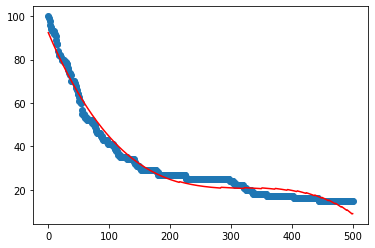

In [6]:
conc_A = 0

for i in range(H+1):
    conc_A += x[i]*tempo**i

fig = plt.figure()

plt.scatter(tempo, b)

plt.plot(tempo, conc_A, c='r')

plt.plot

In [ ]:
# Setting the model
def v(S, u_max, Km):
    return u_max*S/(Km + S)